In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
sys.path.insert(0, '../005_src/') #use relative path
#os.chdir("../005_src")

from config import *

----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Functions Plotting import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------



In [2]:
device = cudaOverview()

CUDA not available, running on cpu


In [3]:
from _03_Networks.GCN_006.GCN_model_006 import *
check_import()
from _03_Networks.GCN_006.GCN_trainer_006 import *

imported model: GCN_006 at 11h45m49s
edges_attr=True


## RELOAD

In [4]:
this_date = "20210711"
ts = "11h26m51s"
GCN_num = "006"
this_GCN = f"GCN_{GCN_num}"
MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_TODAY = os.path.join(MODEL_OUTPUT_PATH,f"{this_date}-{ts}/")
print (MODEL_OUTPUT_PATH_TODAY)

dateset_test_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/dataset_test"
dict_text_output_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/{this_date}-{ts}_training_parameters"

dateset_test = pkl.load(open(f'{dateset_test_path}.pkl',"rb"))

reloaded_dict = pkl.load(open(f'{dict_text_output_path}.pkl',"rb"))
reloaded_dict

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_006/20210711-11h26m51s/


{'run_time': '11h26m51s',
 'model': 'GCN_006',
 'random_seed': 42,
 'train_size': 0.9,
 'batch_size': 256,
 'Nepochs': 10,
 'save_every': 5,
 'transformstat': False,
 'plotstat': True,
 'printstat': True,
 'intentionstat': True,
 'input_file_name': '20210710-13h21m45s_timesteps15000_ec3500_em7000',
 'num_rows_training': 9094,
 'num_rows_validation': 909,
 'num_rows_test': 102,
 'exclude_yaw': True,
 'concatenatestat': True,
 'paddingstat': False,
 'size_input': 5,
 'size_output': 2,
 'model_architecture': GCN(
   (conv1): GCNConv(5, 16)
   (conv2): GCNConv(16, 2)
 ),
 'criterion': MSELoss(),
 'optimizer': Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 0.001
     weight_decay: 0
 ),
 'model_path': '/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_006/20210711-11h26m51s/20210711-11h26m51sEPOCH_10of10_FINAL__GCN_006.pt',
 'train_losses_path': '/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_006

In [5]:
# load losses
t_losses_load = pkl.load(open( reloaded_dict['train_losses_path'], 'rb'))
v_losses_load = pkl.load(open( reloaded_dict['val_losses_path'], 'rb'))

Plot saved in /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_006/20210711-11h26m51s/20210711-11h26m51s_train_val_loss_plot.png


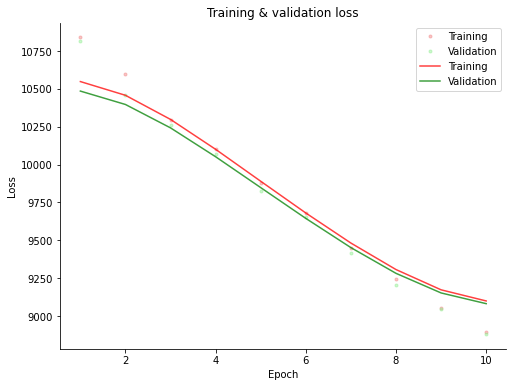

In [6]:
##================================
# TRAIN AND VAL LOSSES
##================================
fig = plot_training(t_losses_load,
                  v_losses_load,
                  learning_rate = None,
                  gaussian=True,
                  sigma=2,
                  figsize=(8, 6),
                  mytitle = 'Training & validation loss'
                  )

description = f"{this_date}-{ts}"
new_png = f"{description}_train_val_loss_plot.png"
new_png_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,new_png)
plt.savefig(new_png_path)
print (f"Plot saved in {new_png_path}")

## Verification
of results

In [7]:
type(reloaded_dict['size_input'])

int

In [8]:
# load model
# defining the model
load_model = GCN(num_input_features=reloaded_dict['size_input'],
            num_output_features =reloaded_dict['size_output'],
            random_seed = 42,
            hc_1 = 16,
           )


In [9]:
load_path = reloaded_dict['model_path']
load_model.load_state_dict(torch.load(load_path))
load_model.eval()

GCN(
  (conv1): GCNConv(5, 16)
  (conv2): GCNConv(16, 2)
)

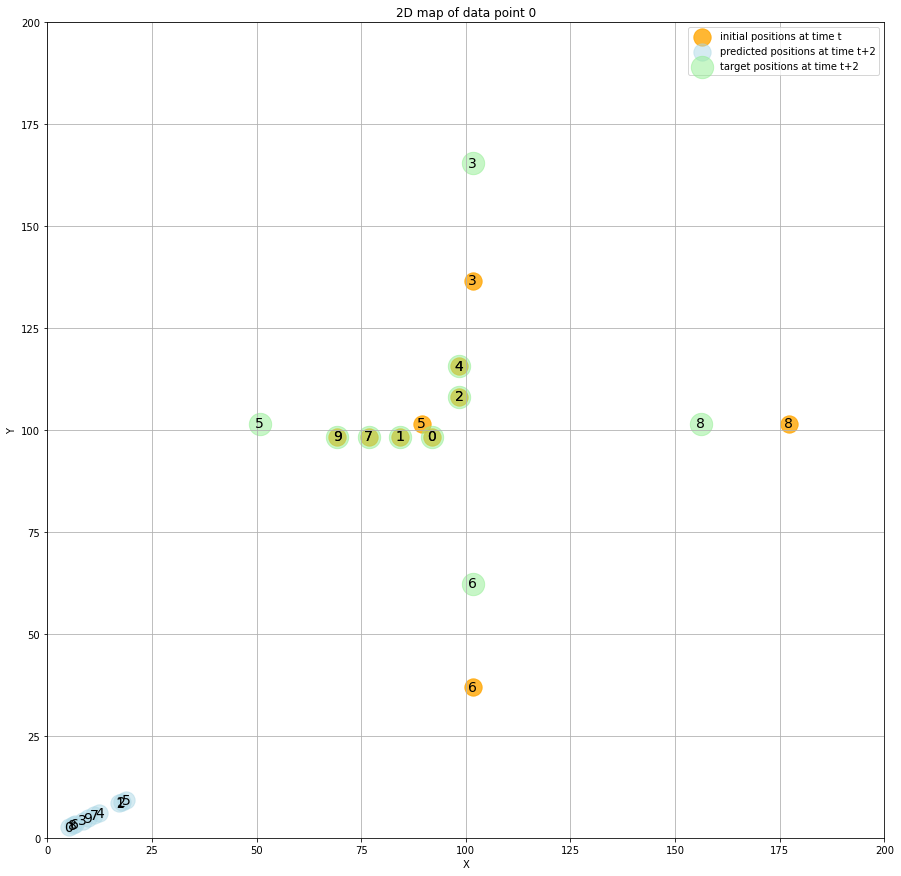

In [14]:
plot_results_model(
                   load_model, 
                   dateset_test[0],
                   start_from = 0,
                   end_at = 10,
                   edges_attr = True,
                   figsize = (15,15),
                   plot_input = True,
                   plot_target = True,
                   plot_prediction = True,
                   plot_intention = False, 
                  )

In [11]:
deleted_folders = delete_empty_r(directory= OUTPUT_DIR,
                                                 printstat = True)